Ciência da computação (Noturno)
Estrutura de dados N1

Luís Filipe Silva Santos
Luana Stoinski


                                            SISTEMA DE CADASTRO E ANÁLISE DE NOTAS DE ALUNOS

Entrada inválida. Preencha os campos corretamente!

Tabela de Alunos:
       Nota A1  Nota A2  Quantidade de Faltas
Luis       4.8      3.5                   3.0
luana      5.0      3.0                   2.0


<Figure size 1200x600 with 0 Axes>

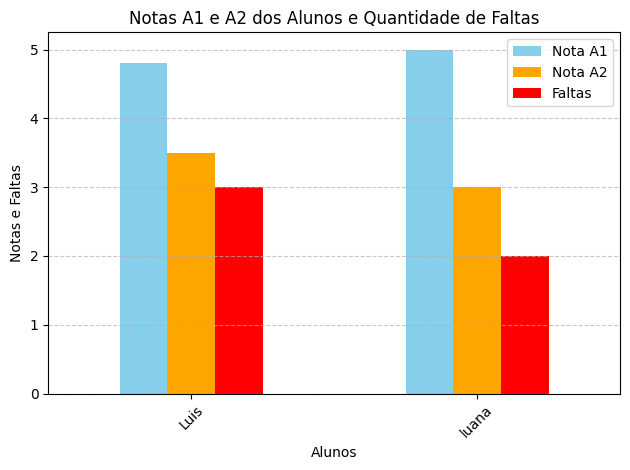

In [1]:
# Importação de bibliotecas para análise de dados e visualização de gráficos
import pandas as pd
import matplotlib.pyplot as plt

# Criação de dicionário vazio para armazenar as informações do aluno
dic_alunos = {}

# Looping infinito que permite que o usuário insira dados até o momento em que ele desejar parar
while True:
    # Looping que permite o usuário digitar os valores novamente caso a entrada fornecida pelo mesmo seja inválida (Entradas tratadas por try e except)
    while True:
        try:
            # Informações do aluno
            aluno = input('Digite o nome do aluno: ')
            nota_A1 = float(input('Digite a nota da avaliação A1: '))
            nota_A2 = float(input('Digite a nota da avaliação A2: '))
            qtde_faltas = float(input('Digite a quantidade de faltas: '))
            break
        except ValueError:
            print('Entrada inválida. Preencha os campos corretamente!')

    # Adiciona os valores em formato de tupla referente à chave do dicionário
    dic_alunos[aluno] = (nota_A1, nota_A2, qtde_faltas)

    # Permite que o usuário cadastre mais alunos ou encerre o programa para que as informações possam ser exibidas
    cadastrar_outro_aluno = input('Deseja cadastrar mais um aluno: (S/N)').upper()
    if cadastrar_outro_aluno != 'S':
        break

# Aulas totais em um semstre. Utilizada para calcular a porcentagem de faltas
total_aulas = 19

# Dicionário vazio que irá armazenar as novas informações dos alunos
situacao_alunos = {}

# Percorre todas chaves e informações do dic_alunos retornando os pares chave-valor
for aluno, info in dic_alunos.items():
    # Faz o unpacking da tupla 'info'
    nota_A1, nota_A2, qtde_faltas = info

    # Cálculo da nota  final e porcentagem de faltas
    nota_final = nota_A1 + nota_A2
    porcentagem_faltas = qtde_faltas / total_aulas

    # Aprovação do aluno feita de acordo com o plano de ensino da disciplina 
    if nota_final >= 6 and porcentagem_faltas <= 0.25:
        situacao = 'APROVADO!'
    elif porcentagem_faltas > 0.25:
        situacao = "REPROVADO POR FALTA!"
    elif nota_A1 < 1 or nota_A2 < 1:
        situacao = 'REPROVADO!'
    else:
        situacao = 'AVALIAÇÃO FINAL!'
    # Adiciona as informações refrente a aprovação ou não do aluno ao dicionário
    situacao_alunos[aluno] = (nota_final, porcentagem_faltas * 100, situacao)

# Criando DataFrames para visualização onde as chaves serão as linhas e as informações serão as colunas
df_alunos = pd.DataFrame.from_dict(dic_alunos, orient='index', columns=['Nota A1', 'Nota A2', 'Quantidade de Faltas'])
df_situacao = pd.DataFrame.from_dict(situacao_alunos, orient='index', columns=['Nota Final', 'Porcentagem de Faltas (%)', 'Situação'])

# Arredondando todos os valores numéricos para 1 casa decimal e ordenando a lista em ordem alfabética
df_alunos = df_alunos.round(1).sort_index()
df_situacao[['Nota Final', 'Porcentagem de Faltas (%)']] = df_situacao[['Nota Final', 'Porcentagem de Faltas (%)']].round(1)
df_situacao = df_situacao.sort_index()

# Exibindo aa tabela referente às informações do aluno
print("\nTabela de Alunos:")
print(df_alunos)

# Gráfico de Notas do tipo barra 
plt.figure(figsize=(12, 6))
df_alunos[['Nota A1', 'Nota A2', 'Quantidade de Faltas']].plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('Notas A1 e A2 dos Alunos e Quantidade de Faltas')
plt.xlabel('Alunos')
plt.ylabel('Notas e Faltas')
plt.xticks(rotation=45)
plt.legend(["Nota A1", "Nota A2", "Faltas"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [2]:
# Lista de conteúdos de cada avaliação
conteudos_A1 = ['Tipos de dados', 'Linguagem de programação']
conteudos_A2 = ['Comandos de decisão', 'Comandos de repetição', 'Estruturas de repetição', 'Programação estruturada']

# Lista das notas que serão utilizados para calcular as médias de cada avaliação
lista_notas_A1 = []
lista_notas_A2 = []

# Percorre todas chaves e informações do dic_alunos retornando os pares chave-valor
for aluno, info in dic_alunos.items():
    # Faz o unpacking da tupla 'info'
    nota_A1, nota_A2, qtde_faltas = info
    # Adiciona as notas à sua lista referente
    lista_notas_A1.append(nota_A1)
    lista_notas_A2.append(nota_A2)

# Soma cada nota referente
soma_A1 = sum(lista_notas_A1)
soma_A2 = sum(lista_notas_A2)

# Calcula a média
media_A1 = soma_A1 / len(lista_notas_A1)
media_A2 = soma_A2 / len(lista_notas_A2)

# Verifica qual a maior dúvida dos alunos
if media_A1 < media_A2:
    print(f'Os alunos estão com mais dificuldades em: {conteudos_A1}')
elif media_A1 > media_A2:
    print(f'Os alunos estão com mais dificuldades em: {conteudos_A2}')
else:
    print('Os alunos estão com muitas dúvidas em ambos conteúdos')


Os alunos estão com mais dificuldades em: ['Comandos de decisão', 'Comandos de repetição', 'Estruturas de repetição', 'Programação estruturada']


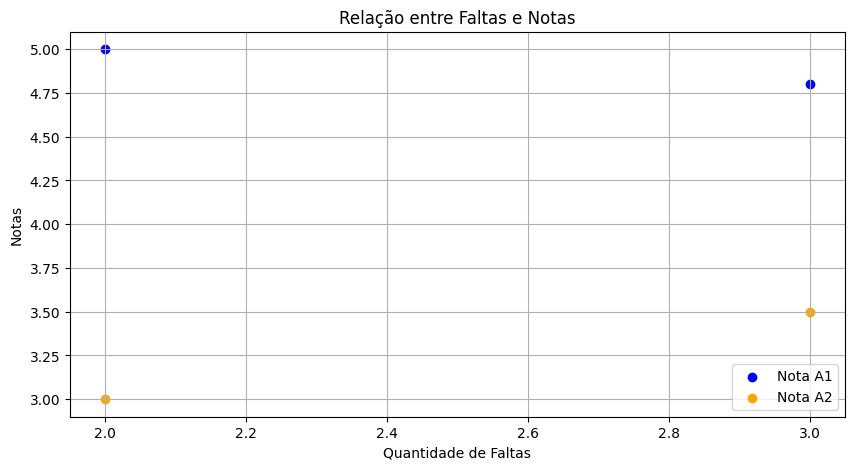

In [3]:
# Gráfico de dispersão para visualizar a relação entre faltas e notas
plt.figure(figsize=(10, 5))
plt.scatter(df_alunos['Quantidade de Faltas'], df_alunos['Nota A1'], color='blue', label='Nota A1')
plt.scatter(df_alunos['Quantidade de Faltas'], df_alunos['Nota A2'], color='orange', label='Nota A2')
plt.title('Relação entre Faltas e Notas')
plt.xlabel('Quantidade de Faltas')
plt.ylabel('Notas')
plt.legend()
plt.grid(True)
plt.show()



Tabela de Situação dos Alunos:
       Nota Final  Porcentagem de Faltas (%)   Situação
Luis          8.3                       15.8  APROVADO!
luana         8.0                       10.5  APROVADO!


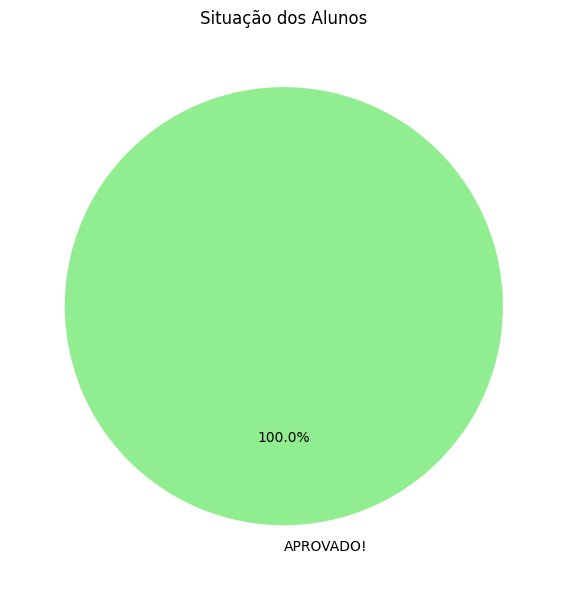

In [4]:
# Exibindo a tabela referente á situação do aluno
print("\nTabela de Situação dos Alunos:")
print(df_situacao)

# Gráfico de Situação do tipo pizza
situacao_counts = df_situacao['Situação'].value_counts()
plt.figure(figsize=(8, 6))
situacao_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon', 'lightcoral', 'lightskyblue'])
plt.title('Situação dos Alunos')
plt.ylabel('') 
plt.tight_layout()
plt.show()

